In [2]:
import pandas as pd

test_forecasts = pd.read_csv("../outputs/ml_forecasts.csv", parse_dates=['Date'], index_col='Date')


In [3]:
import numpy as np

# Example using Random Forest residuals
residual_std = (test_forecasts['rf_forecast'] - test_forecasts['Weekly_Sales']).std()
z = 1.65  # for 95% service level
test_forecasts['safety_stock'] = z * residual_std


In [4]:
test_forecasts['recommended_inventory'] = test_forecasts['rf_forecast'] + test_forecasts['safety_stock']


In [5]:
# Under-forecast risk (forecast << actual)
test_forecasts['under_forecast_risk'] = test_forecasts['rf_forecast'] < test_forecasts['Weekly_Sales']

# Over-forecast risk (forecast + safety_stock >> actual)
test_forecasts['over_forecast_risk'] = test_forecasts['recommended_inventory'] > 1.2 * test_forecasts['Weekly_Sales']


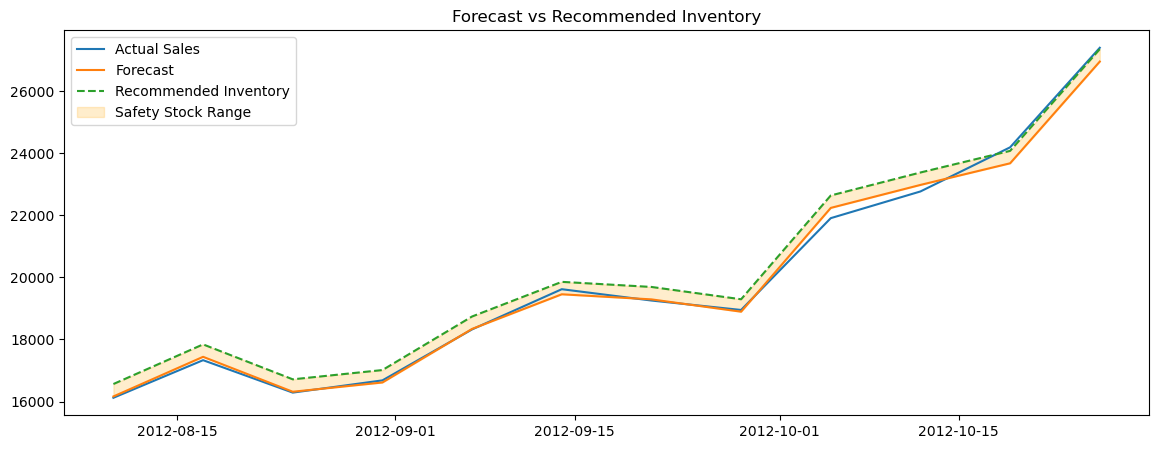

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(test_forecasts.index, test_forecasts['Weekly_Sales'], label='Actual Sales')
plt.plot(test_forecasts.index, test_forecasts['rf_forecast'], label='Forecast')
plt.plot(test_forecasts.index, test_forecasts['recommended_inventory'], label='Recommended Inventory', linestyle='--')
plt.fill_between(
    test_forecasts.index,
    test_forecasts['rf_forecast'],
    test_forecasts['recommended_inventory'],
    color='orange',
    alpha=0.2,
    label='Safety Stock Range'
)
plt.legend()
plt.title('Forecast vs Recommended Inventory')
plt.show()


In [7]:
test_forecasts.to_csv("../outputs/inventory_recommendations.csv")


In [8]:
import matplotlib.pyplot as plt

# Example: Forecast vs Inventory plot
plt.figure(figsize=(14,5))
plt.plot(test_forecasts.index, test_forecasts['Weekly_Sales'], label='Actual Sales')
plt.plot(test_forecasts.index, test_forecasts['rf_forecast'], label='Forecast')
plt.plot(test_forecasts.index, test_forecasts['recommended_inventory'], label='Recommended Inventory', linestyle='--')
plt.fill_between(
    test_forecasts.index,
    test_forecasts['rf_forecast'],
    test_forecasts['recommended_inventory'],
    color='orange',
    alpha=0.2,
    label='Safety Stock Range'
)
plt.legend()
plt.title('Forecast vs Recommended Inventory')

# Save the plot
plt.savefig("../outputs/figures/forecast_vs_inventory.png", dpi=300)
plt.close()  # closes the figure to free memory


NameError: name 'residuals' is not defined